In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import plotly.express as px
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
cf.go_offline()
init_notebook_mode(connected=True)

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In [26]:
df = pd.read_csv('../input/california-housing-prices/housing.csv')

In [27]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# checking for null values

In [29]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

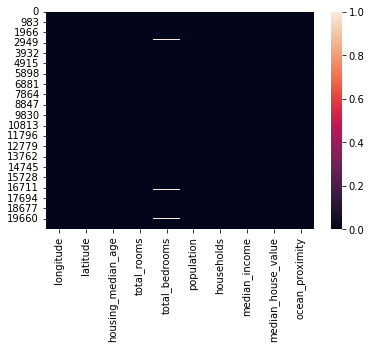

In [30]:
sns.heatmap(df.isnull())

In [31]:
bedroom_mean = df['total_bedrooms'].mean()
df['total_bedrooms'].fillna(bedroom_mean,inplace = True)

<AxesSubplot:>

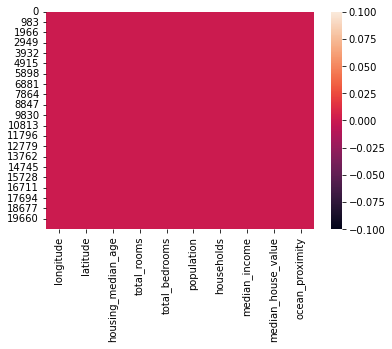

In [32]:
sns.heatmap(df.isnull())

# We have eliminated all the null values

# Data Visualization

In [33]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:xlabel='longitude', ylabel='median_house_value'>

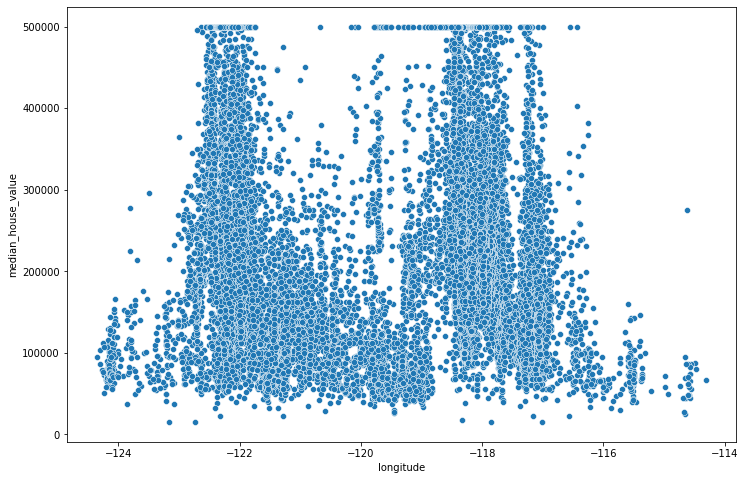

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='longitude', y='median_house_value',data=df)

<AxesSubplot:xlabel='latitude', ylabel='median_house_value'>

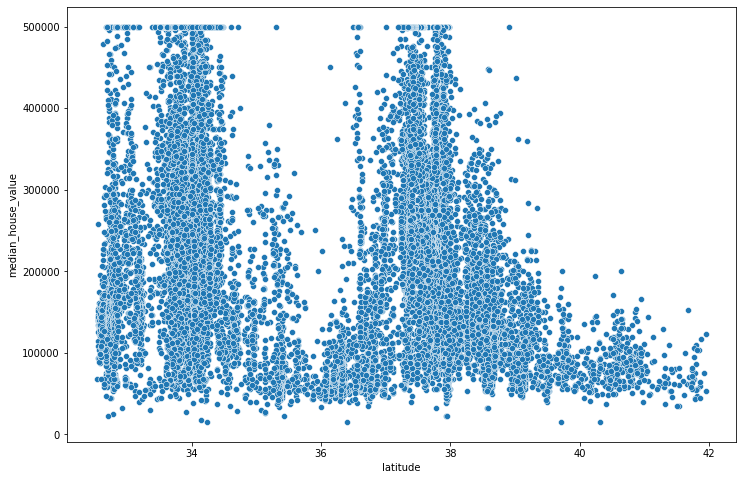

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='latitude', y='median_house_value',data=df)

# You may not be able to understand the significane of the code above so for ease we are going to include longitude and latitude on the same scatterplot.
# but first look at the map of california and then at the scatterplot.
# Look closely
# you will find the shape of same map being plotted by the scatterplot and it will show you the pricing of houses in accordance to that.

In [15]:
from PIL import Image

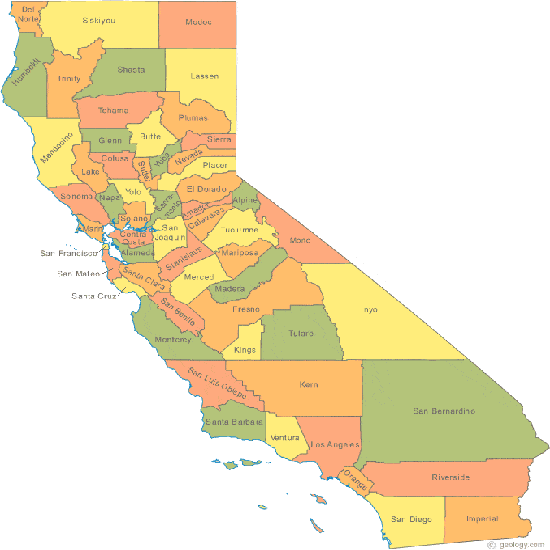

In [16]:
mac = Image.open('../input/california-map-picture/california-county-map.gif')
mac.resize((550,550))

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

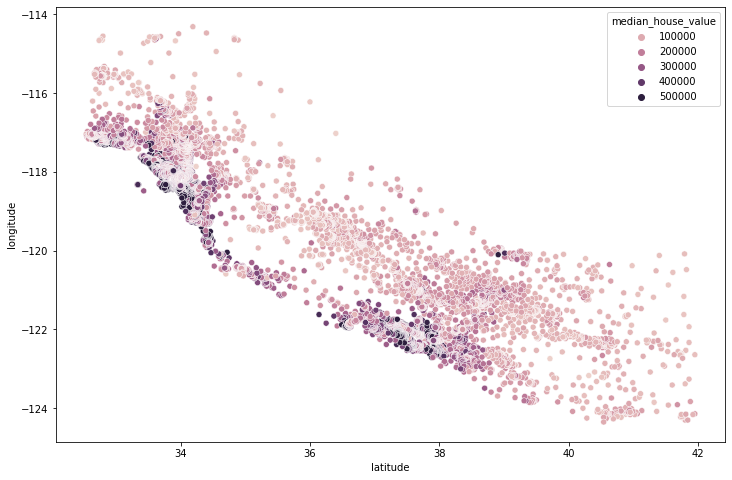

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='latitude', y='longitude',hue='median_house_value',data=df)

In [18]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
df.sort_values('median_house_value',ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10667,-117.88,33.55,27.0,2278.0,316.0,772.0,304.0,10.1275,500001.0,<1H OCEAN
16916,-122.34,37.57,52.0,2635.0,408.0,967.0,374.0,7.0422,500001.0,NEAR OCEAN
16946,-122.33,37.55,33.0,2199.0,312.0,827.0,319.0,6.1349,500001.0,NEAR OCEAN
8877,-118.49,34.04,48.0,2381.0,345.0,859.0,306.0,8.0257,500001.0,<1H OCEAN
8878,-118.50,34.04,52.0,3000.0,374.0,1143.0,375.0,15.0001,500001.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
5887,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN
9188,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
2521,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND
2799,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND


# Exploring wheather being in the proximity of the ocean has any effects upon the price distribution.

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

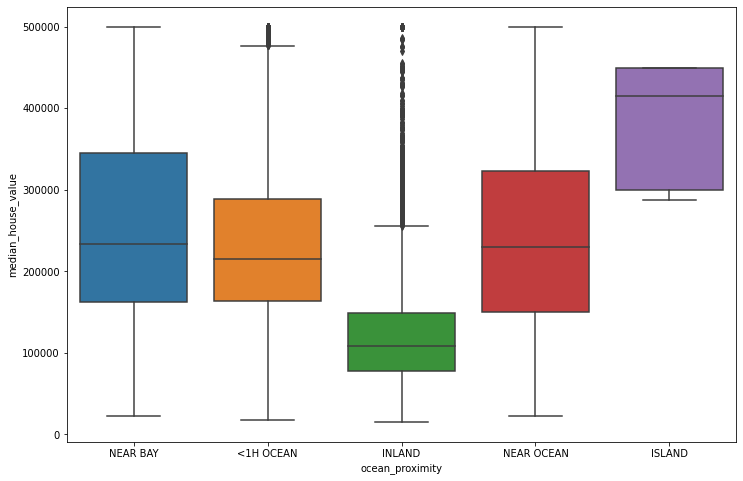

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x='ocean_proximity',y='median_house_value',data=df)

# As below we can see the lesser the population in the area the higher is the house value

<AxesSubplot:xlabel='population', ylabel='median_house_value'>

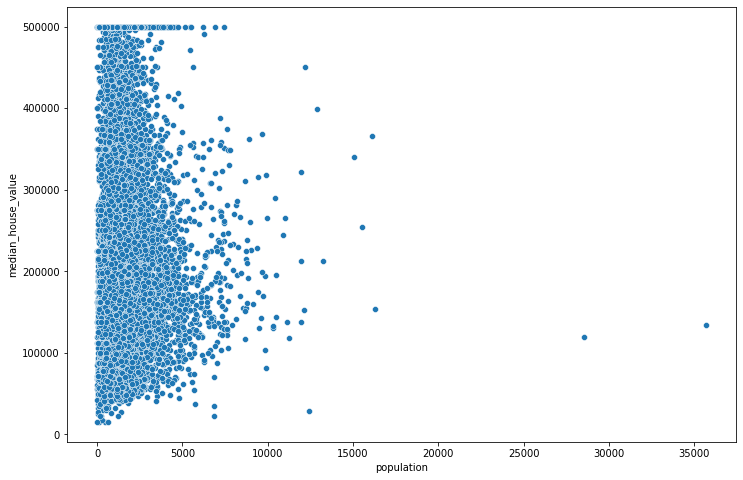

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='population',y='median_house_value',data=df)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

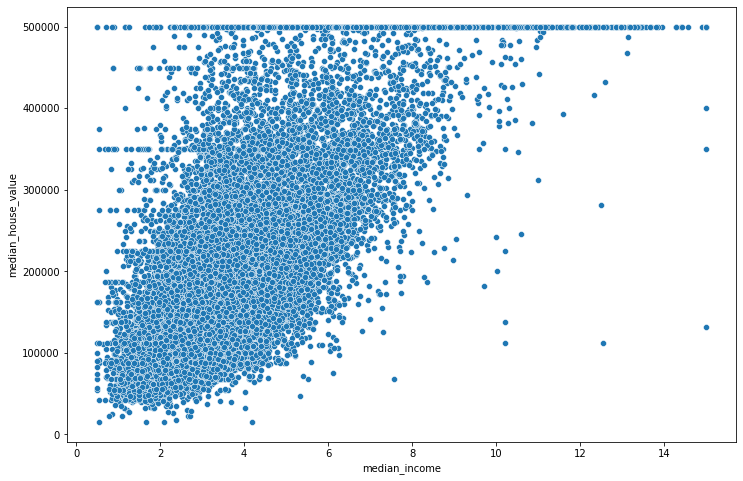

In [39]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='median_income',y='median_house_value',data=df)

<AxesSubplot:xlabel='households', ylabel='median_house_value'>

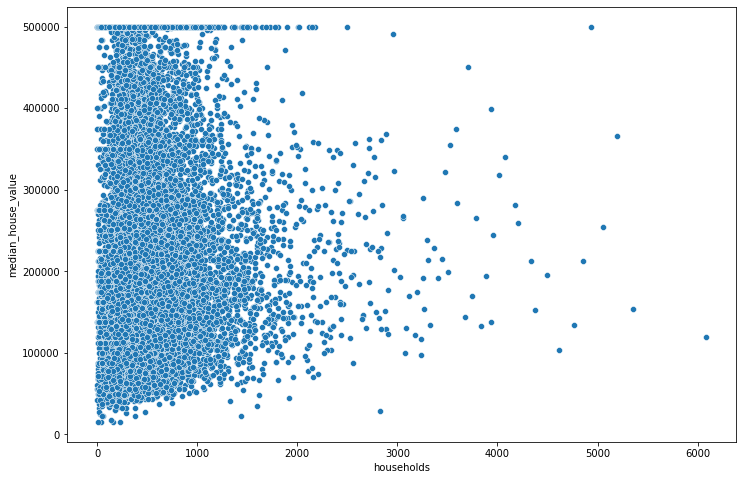

In [40]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='households',y='median_house_value',data=df)

# Being a non numeric, I'm going to remove ocean proximity from the dataset

In [34]:
df = df.drop('ocean_proximity',axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [45]:
X = df.drop('median_house_value',axis=1).values
y = df['median_house_value'].values

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Standard Scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()

In [50]:
X_train = scaler.fit_transform(X_train)

In [51]:
X_test = scaler.transform(X_test)

# Neural Network Build-up

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [54]:
X_test.shape

(6192, 8)

In [55]:
X_train.shape

(14448, 8)

In [57]:
model = Sequential()

model.add(Dense(8,activation = 'relu'))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(8,activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [58]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),
         batch_size=128,epochs=400)

2022-02-15 21:06:29.484442: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/400
113/113 [==============================] - 1s 5ms/step - loss: 55868514304.0000 - val_loss: 56656121856.0000
Epoch 2/400
113/113 [==============================] - 0s 3ms/step - loss: 55868375040.0000 - val_loss: 56655814656.0000
Epoch 3/400
113/113 [==============================] - 0s 3ms/step - loss: 55866609664.0000 - val_loss: 56650641408.0000
Epoch 4/400
113/113 [==============================] - 0s 3ms/step - loss: 55848660992.0000 - val_loss: 56609579008.0000
Epoch 5/400
113/113 [==============================] - 0s 3ms/step - loss: 55752466432.0000 - val_loss: 56429666304.0000
Epoch 6/400
113/113 [==============================] - 0s 2ms/step - loss: 55418753024.0000 - val_loss: 55884951552.0000
Epoch 7/400
113/113 [==============================] - 0s 2ms/step - loss: 54563471360.0000 - val_loss: 54639030272.0000
Epoch 8/400
113/113 [==============================] - 0s 2ms/step - loss: 52829765632.0000 - val_loss: 52315156480.0000
Epoch 9/400
113/113 [===========

In [61]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,5.586851e+10,5.665612e+10
1,5.586838e+10,5.665581e+10
2,5.586661e+10,5.665064e+10
3,5.584866e+10,5.660958e+10
4,5.575247e+10,5.642967e+10


<AxesSubplot:>

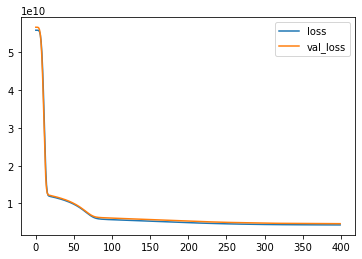

In [62]:
losses.plot()

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [64]:
predictions = model.predict(X_test)

In [65]:
mean_squared_error(y_test,predictions)

4644959340.774853

In [66]:
mean_squared_error(y_test,predictions)**0.5

68153.93855658565

In [67]:
np.sqrt(mean_squared_error(y_test,predictions))

68153.93855658565

In [68]:
mean_absolute_error(y_test,predictions)

47904.2205684376

In [70]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [71]:
df.median_house_value.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [73]:
explained_variance_score(y_test,predictions)

0.6573252650983648

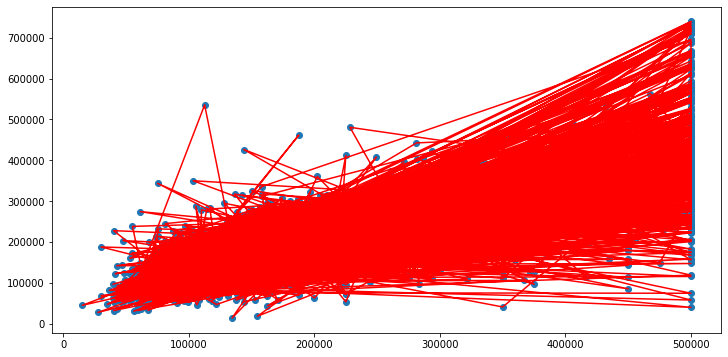

In [75]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,predictions,'r')

# Let's use our Model to predict the price of a House in California.

here first we are using the data on the 1st house of the dataset

In [80]:
single_house = df.drop('median_house_value',axis=1).iloc[0]
single_house

longitude            -122.2300
latitude               37.8800
housing_median_age     41.0000
total_rooms           880.0000
total_bedrooms        129.0000
population            322.0000
households            126.0000
median_income           8.3252
Name: 0, dtype: float64

In [82]:
single_house.values.reshape(-1,8)

array([[-122.23  ,   37.88  ,   41.    ,  880.    ,  129.    ,  322.    ,
         126.    ,    8.3252]])

We need to scale the features of the house.

In [83]:
single_house = scaler.transform(single_house.values.reshape(-1,8))

In [84]:
model.predict(single_house)

array([[420515.5]], dtype=float32)

So above is the predicted price of the single house

And below is the actual value of the house given

In [87]:
df.median_house_value.iloc[0]

452600.0

# So Our prediction is off by 30k and that's usually because of the outliers in the data. But the good news is we are on the right track. Thank You!